In [108]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio import plot


In [109]:
import os
os.listdir('C:/Users/LENOVO/Downloads/LC08_L1TP_151040_20220509_20220518_02_T1')


['LC08_L1TP_151040_20220509_20220518_02_T1_ANG.txt',
 'LC08_L1TP_151040_20220509_20220518_02_T1_B1.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_B10.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_B11.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_B2.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_B3.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_B4.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_B5.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_B6.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_B7.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_B8.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_B9.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_MD5.txt',
 'LC08_L1TP_151040_20220509_20220518_02_T1_MTL.txt',
 'LC08_L1TP_151040_20220509_20220518_02_T1_MTL.xml',
 'LC08_L1TP_151040_20220509_20220518_02_T1_QA_PIXEL.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_QA_RADSAT.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_SAA.TIF',
 'LC08_L1TP_151040_20220509_20220518_02_T1_S

In [110]:
band4=rasterio.open('C:/Users/LENOVO/Downloads/LC08_L1TP_151040_20220509_20220518_02_T1/LC08_L1TP_151040_20220509_20220518_02_T1_B4.TIF')
band5=rasterio.open('C:/Users/LENOVO/Downloads/LC08_L1TP_151040_20220509_20220518_02_T1/LC08_L1TP_151040_20220509_20220518_02_T1_B5.TIF')


In [111]:
print(band4.height)

7751


In [112]:
print(band5.width)

7601


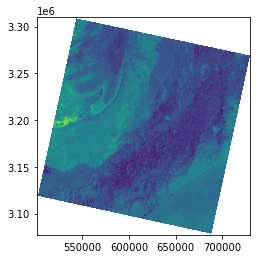

<AxesSubplot:>

In [113]:
plot.show(band4)

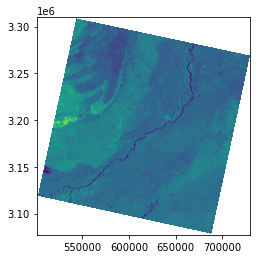

<AxesSubplot:>

In [114]:
plot.show(band5)

In [115]:
band4.dtypes[0]
band5.dtypes[0]

'uint16'

In [116]:
band5.crs

In [117]:
band5.transform
band4.transform

Affine(30.0, 0.0, 501285.0,
       0.0, -30.0, 3309915.0)

In [118]:
band5.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [119]:
red=band4.read(1).astype('float64')
nir=band5.read(1).astype('float64')

In [120]:
a=red.round(4)
a[200][70]

0.0

In [121]:
import pandas as pd
df=pd.DataFrame(a)


In [122]:
df.to_csv('filendvi.csv')

In [123]:
band5.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [124]:
ndvi=np.where(
    (nir+red)==0.,
    0,
    (nir-red)/(nir+red)
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7560\1761573803.py:4: RuntimeWarning: invalid value encountered in true_divide
  (nir-red)/(nir+red)


In [125]:
image=rasterio.open('C:/Users/LENOVO/Downloads/LC08_L1TP_151040_20220509_20220518_02_T1/New folder/NDVI.tiff','w',driver='',
                    width=band5.width,
                    height=band5.height,
                   count=1,
                   crs=band5.crs,
                   transform=band5.transform,
                   dtype='float64')
image.write(ndvi,1)
image.close()

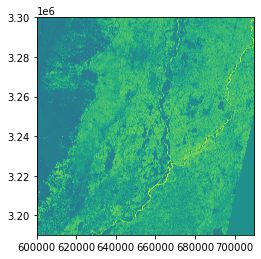

<AxesSubplot:>

In [136]:
ndvi=rasterio.open('D:/rajanpur NDMI Data/L2A_T42RXT_A034265_20220113T060215_2022-01-13_con/NDVI.tiff')
plot.show(ndvi)

In [134]:
a = ndvi.read()
# dir(ndvi)

In [135]:
a.shape

(1, 5490, 5490)